In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("united_filtered.csv", sep=';')

**Описание признаков и их типов**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88947 entries, 0 to 88946
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               88131 non-null  object 
 1   author_type          88216 non-null  object 
 2   url                  88947 non-null  object 
 3   location             88947 non-null  object 
 4   deal_type            88947 non-null  object 
 5   accommodation_type   88947 non-null  object 
 6   floor                88947 non-null  int64  
 7   floors_count         88947 non-null  int64  
 8   rooms_count          88947 non-null  int64  
 9   total_meters         88947 non-null  float64
 10  price                88061 non-null  float64
 11  district             77156 non-null  object 
 12  street               77832 non-null  object 
 13  house_number         82167 non-null  object 
 14  underground          87282 non-null  object 
 15  residential_complex  47102 non-null 

In [ ]:
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,Sminex,developer,https://www.cian.ru/sale/flat/306341805/,Москва,sale,flat,5,12,4,184.7,460790000.0,Хамовники,Фрунзенская набережная,30,Фрунзенская,Клубный город-парк
1,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/297733877/,Москва,sale,flat,80,85,4,294.6,412440000.0,Пресненский,Московский международный деловой центр Москва-...,NaN,Деловой центр,NaN
2,VESPER,developer,https://www.cian.ru/sale/flat/306541543/,Москва,sale,flat,18,21,4,234.3,328184010.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
3,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/293126875/,Москва,sale,flat,21,23,4,244.1,78000000.0,Хорошевский,Гризодубовой,2,ЦСКА,Гранд-парк
4,Sminex,developer,https://www.cian.ru/sale/flat/303408628/,Москва,sale,flat,5,14,4,198.4,557450000.0,Якиманка,NaN,NaN,Полянка,Лаврушинский ЖК


**Информация о пропущенных значениях**

In [ ]:
df.isna().sum()

,0
author,816
author_type,731
url,0
location,0
deal_type,0
accommodation_type,0
floor,0
floors_count,0
rooms_count,0
total_meters,0


In [ ]:
# Удалим из датафрейма столбцы, не несущие смысловой нагрузки, а также те, где все значения одинаковы (например, location - город, тип сделки)
df_filtered = df.drop(['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'residential_complex'], axis=1)

**Основные статистики**

In [ ]:
df_filtered.describe(include='all')

,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground
count,88947.000000,88947.000000,88947.000000,88947.000000,8.806100e+04,77156,77832,82167,87282
unique,NaN,NaN,NaN,NaN,NaN,180,2371,3788,345
top,NaN,NaN,NaN,NaN,NaN,Раменки,Зеленоград,2,Рассказовка
freq,NaN,NaN,NaN,NaN,NaN,3687,754,2000,1504
mean,9.572993,18.577276,1.988825,63.611461,3.459065e+07,NaN,NaN,NaN,NaN
std,8.609934,12.449811,1.095618,41.474523,6.910317e+07,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,0.300000,1.550000e+06,NaN,NaN,NaN,NaN
25%,4.000000,9.000000,1.000000,38.900000,1.225000e+07,NaN,NaN,NaN,NaN
50%,7.000000,16.000000,2.000000,54.000000,1.750000e+07,NaN,NaN,NaN,NaN
75%,13.000000,24.000000,3.000000,74.000000,3.040000e+07,NaN,NaN,NaN,NaN


**Поиск и удаление дубликатов**

In [ ]:
if df_filtered.duplicated().any():
  df_filtered = df_filtered.drop_duplicates()
else:
  print('Полные дубликаты отсутствуют!')

**Поиск пропущенных значений и способы обработки**

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70622 entries, 0 to 88946
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   floor         70622 non-null  int64  
 1   floors_count  70622 non-null  int64  
 2   rooms_count   70622 non-null  int64  
 3   total_meters  70622 non-null  float64
 4   price         69791 non-null  float64
 5   district      60788 non-null  object 
 6   street        60389 non-null  object 
 7   house_number  64327 non-null  object 
 8   underground   69445 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.4+ MB


In [ ]:
df_filtered['price'] = df_filtered['price'].fillna(df_filtered['price'].median())

In [ ]:
df_filtered['district'] = df_filtered['district'].fillna(df_filtered['district'].mode()[0])
df_filtered['street'] = df_filtered['street'].fillna(df_filtered['street'].mode()[0])
df_filtered['house_number'] = df_filtered['house_number'].fillna(df_filtered['house_number'].mode()[0])
df_filtered['underground'] = df_filtered['underground'].fillna(df_filtered['underground'].mode()[0])

**Валидация значений**

In [ ]:
data = [
    {
        'Название': column,
        'Кол-во отрицательных значений': (df_filtered[column] < 0).sum()
    }
    for column in df_filtered.select_dtypes(['int64', 'float64']).columns
]

pd.DataFrame(data)

,Название,Кол-во отрицательных значений
0,floor,0
1,floors_count,0
2,rooms_count,0
3,total_meters,0
4,price,0


**Изучение поведения каждого признака**

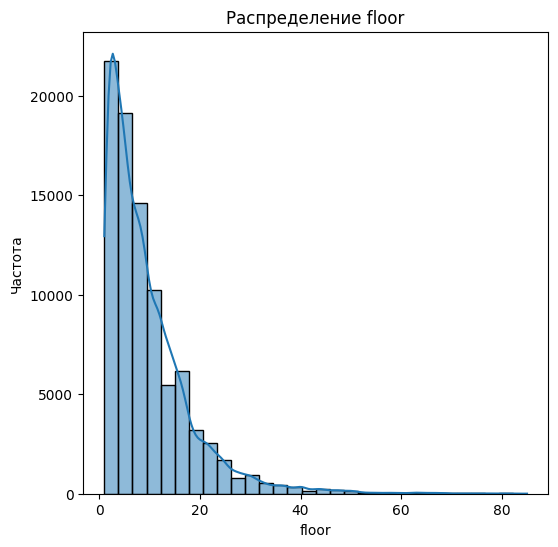

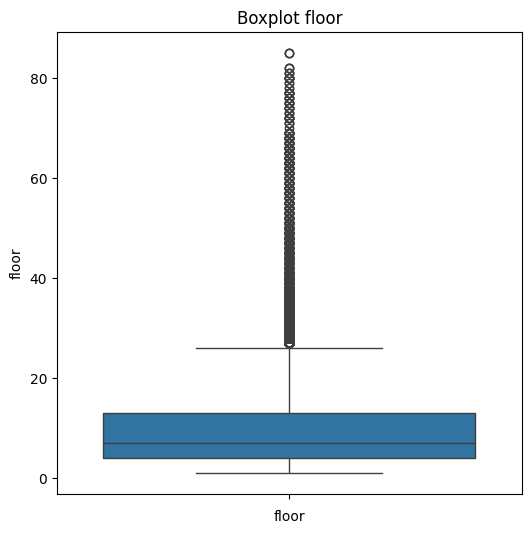

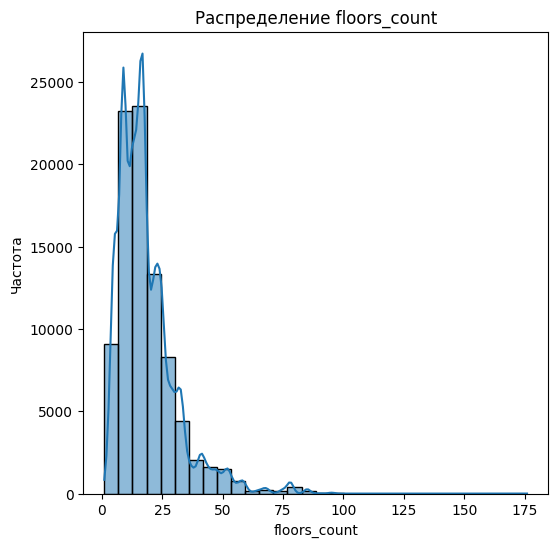

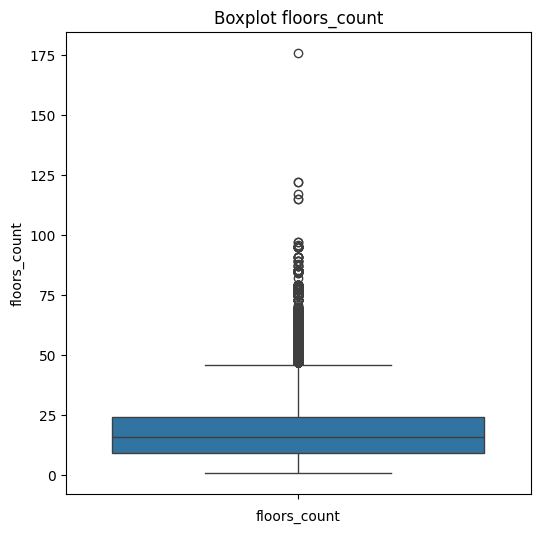

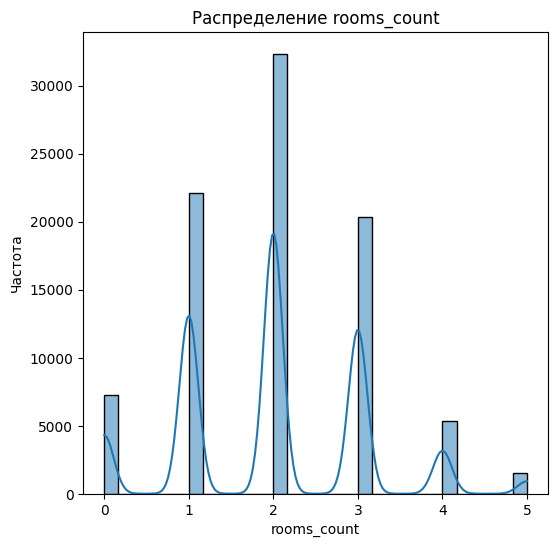

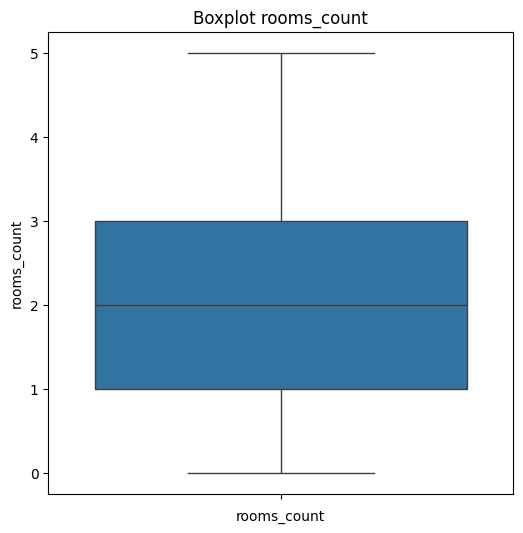

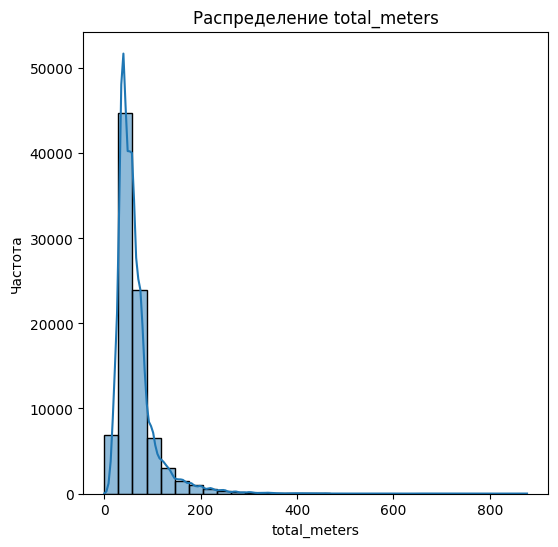

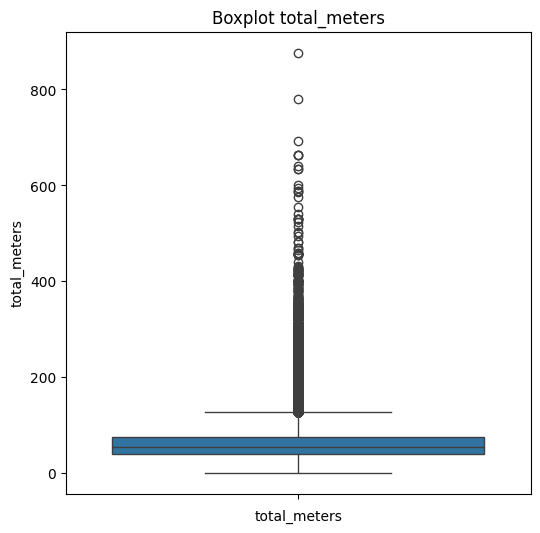

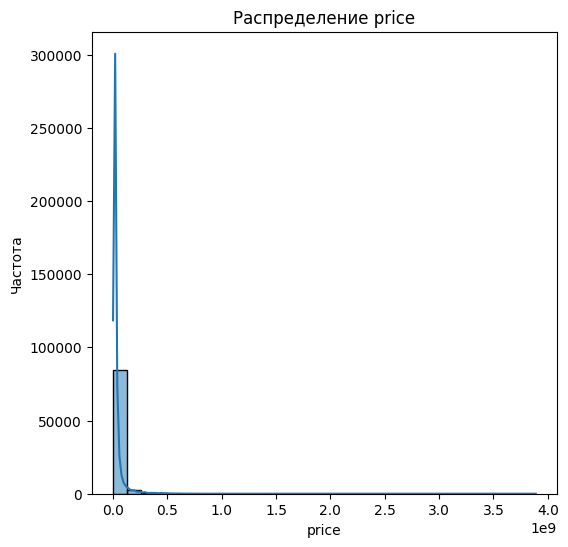

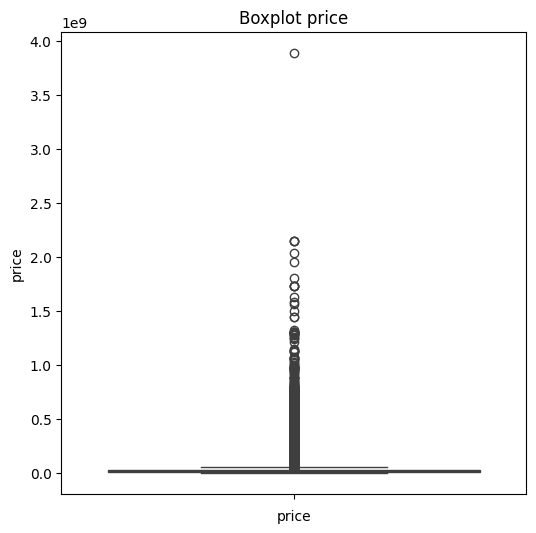

In [ ]:
numerical_features = ['floor', 'floors_count', 'rooms_count', 'total_meters', 'price']

# Визуализация распределений для числовых признаков
for feature in numerical_features:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

    plt.figure(figsize=(6, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot {feature}')
    plt.xlabel(feature)
    plt.show()

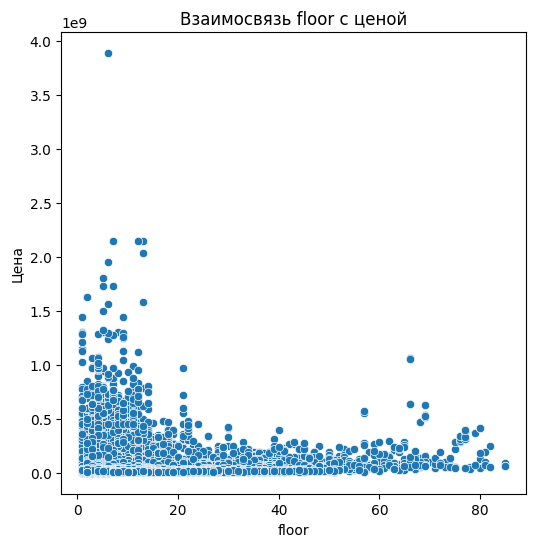

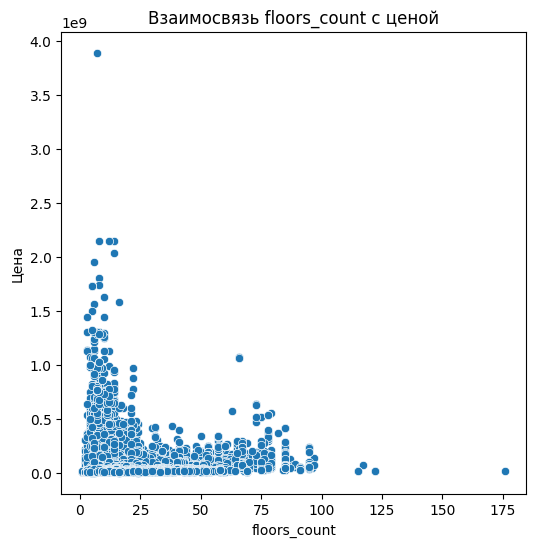

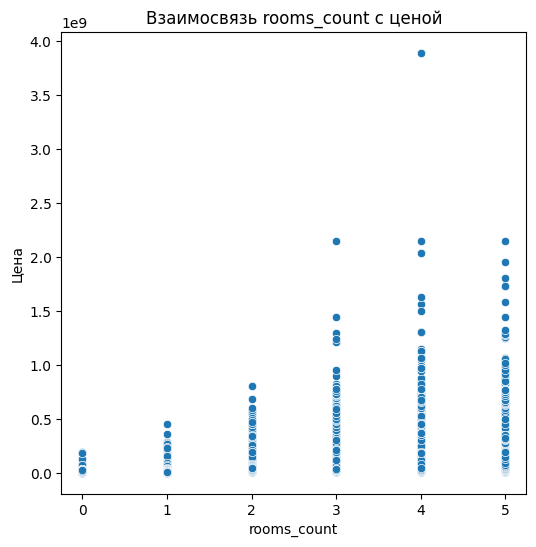

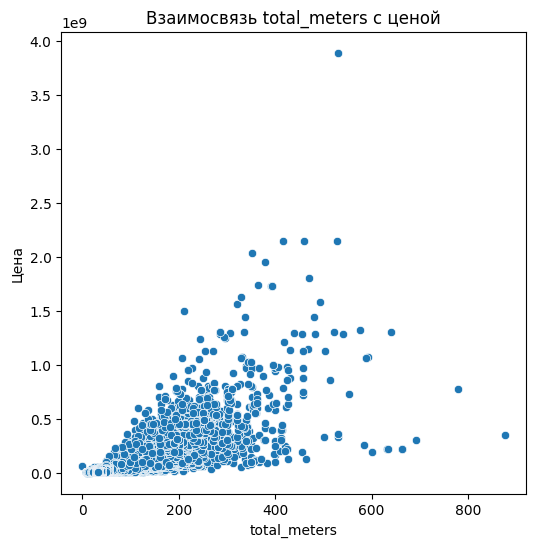

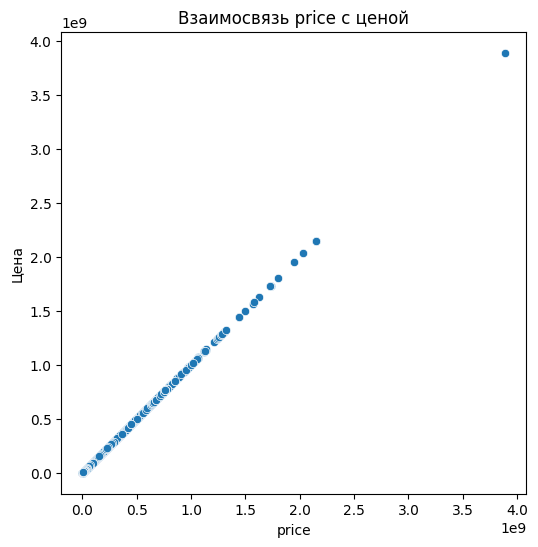

In [ ]:
# Взаимосвязь числовых признаков с ценой
for feature in numerical_features:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'Взаимосвязь {feature} с ценой')
    plt.xlabel(feature)
    plt.ylabel('Цена')
    plt.show()

**Попарные распределения признаков**

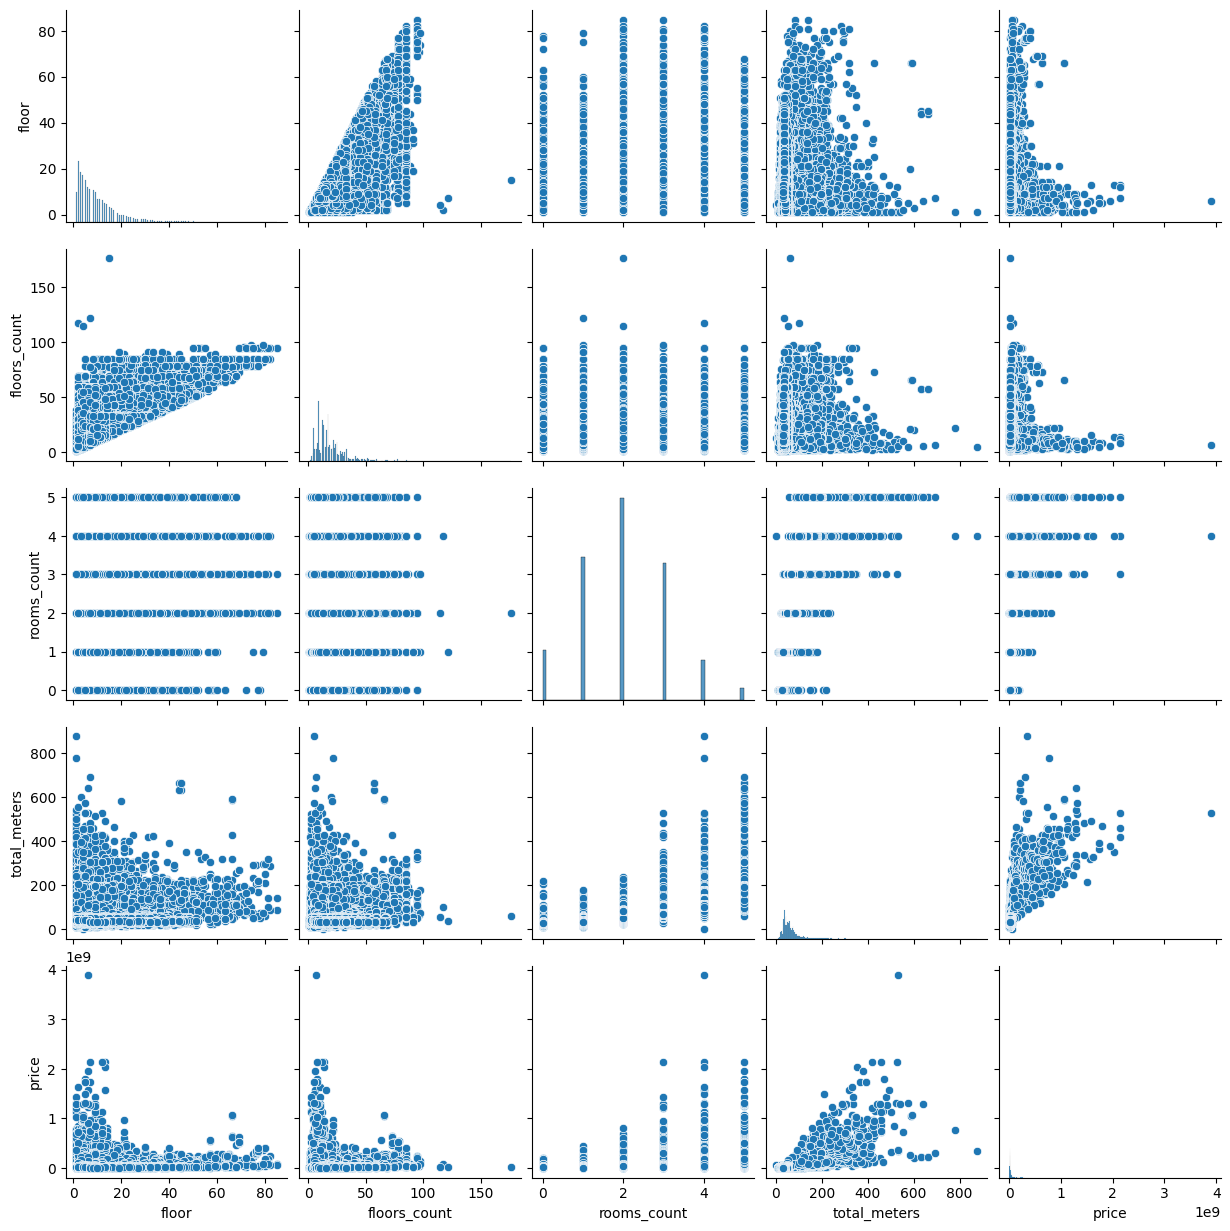

In [ ]:
sns.pairplot(df_filtered)

**Boxplot и выбросы**

<Axes: ylabel='price'>

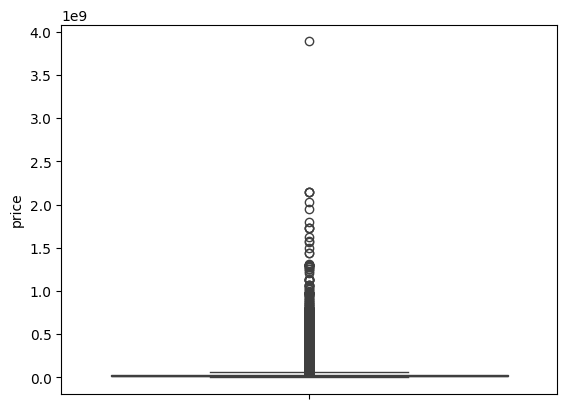

In [ ]:
sns.boxplot(y=df_filtered['price'])

In [ ]:
Q1 = df_filtered['price'].quantile(0.25)
Q3 = df_filtered['price'].quantile(0.75)
IQR = Q3 - Q1

h = Q3 + 1.5 * IQR
l = Q1 - 1.5 * IQR

df_filtered = df_filtered[df_filtered['price'].between(l, h)]

**Корреляционный анализ**

In [ ]:
correlation_matrix = df_filtered.corr(numeric_only=True)
correlation_matrix

,floor,floors_count,rooms_count,total_meters,price
floor,1.000000,0.631226,0.029330,0.103727,0.212409
floors_count,0.631226,1.000000,-0.002699,0.115137,0.292888
rooms_count,0.029330,-0.002699,1.000000,0.838191,0.549897
total_meters,0.103727,0.115137,0.838191,1.000000,0.721641
price,0.212409,0.292888,0.549897,0.721641,1.000000


<Axes: >

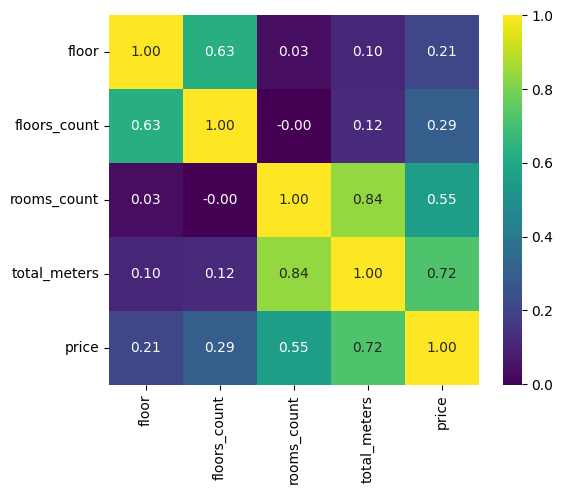

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', square=True)

**1. Поскольку между признаками rooms_count и total_meters наблюдается высокая корреляция, следует удалить один из них для предотвращения мультиколлинеарности. Например, можно удалить rooms_count**

**2. Кроме того, корреляция между признаками floor и floors_count составляет 0.631226. Рекомендуется удалить floors_count**

In [ ]:
df_filtered = df_filtered.drop(['rooms_count', 'floors_count'], axis=1)